# 1. Problem Statement

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants to segment type of ads based on the features provided. 
<br>We have to Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

# 2. Data Collection

## Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

## Importing dataset

In [2]:
#reading the data
df = pd.read_excel('Clustering_Clean_Ads_Data.xlsx')

In [3]:
#viewing top 5 entries of the dataset
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [4]:
#viewing last 5 entries of the dataset
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25856,2020-10-17-3,Format5,720,300,216000,Inter225,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


# 3. Data Preparation & Preprocessing

In [5]:
#rows and columns of the data set
df.shape

(25857, 19)

In [6]:
#information Dtypes, null values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [7]:
#descriptive summary of the dataset
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25857.000000,25857.000000,25857.000000,2.585700e+04,2.585700e+04,2.585700e+04,25857.000000,25857.000000,25857.000000,25857.000000,19392.000000,19392.000000,18330.000000
mean,390.431218,332.182774,99683.276482,2.169621e+06,1.155322e+06,1.107525e+06,9525.881386,2414.473115,0.336729,1716.548955,0.069627,7.252900,0.351061
std,230.696051,194.260924,62640.685612,4.542680e+06,2.407244e+06,2.326648e+06,16721.686071,3932.835240,0.030540,2993.025498,0.074970,6.538314,0.343334
min,120.000000,70.000000,33600.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,9.133000e+03,5.451000e+03,2.558000e+03,305.000000,36.030000,0.350000,23.420000,0.002400,1.630000,0.090000
50%,300.000000,300.000000,75000.000000,3.309680e+05,1.894490e+05,1.621620e+05,3457.000000,1173.660000,0.350000,762.880000,0.007700,3.035000,0.160000
75%,720.000000,600.000000,84000.000000,2.208484e+06,1.008171e+06,9.496930e+05,10681.000000,2692.280000,0.350000,1749.982000,0.128300,12.220000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


## Missing Values

In [8]:
#checking for null values in the dataset
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [9]:
#checking for duplicated values in the dataset
df.duplicated().sum()

0

### Treat missing values in CPC, CTR and CPM using the formula given.

In [10]:
#function to calculate CPM by the formula given & returning CPM
def calculate_CPM(x):
    spend=df['Spend']
    impression = df['Impressions']
    CPM=(spend/impression)*1000
    return CPM

In [11]:
#imputing the function
df.CPM = df[['CPM']].apply(lambda x: calculate_CPM(x))

In [12]:
#function to calculate CPC by the formula given & returning CPC
def calculate_CPC(x):
    spend=df['Spend']
    click = df['Clicks']
    CPC=(spend/click)
    return CPC

In [13]:
df.CPC= df[['CPC']].apply(lambda x: calculate_CPC(x))

In [14]:
#function to calculate CTR by the formula given & returning CTR
def calculate_CTR(x):
    click = df['Clicks']
    impression = df['Impressions']
    CTR=(click/impression)*100
    return CTR

In [15]:
df.CTR = df[['CTR']].apply(lambda z: calculate_CTR(z))

In [18]:
#Taking the neccessary datatypes to impute & replacing int values in CPC to NaN
df_num= df.select_dtypes(include="number")
df_num.replace([np.inf, -np.inf], np.nan, inplace=True)

In [19]:
#Chanding the NaN values to median
df_num.fillna(df_num.median(), inplace=True)

In [21]:
df_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [24]:
#rechecking for missing values
df_num.isnull().sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### Outlier Treatment

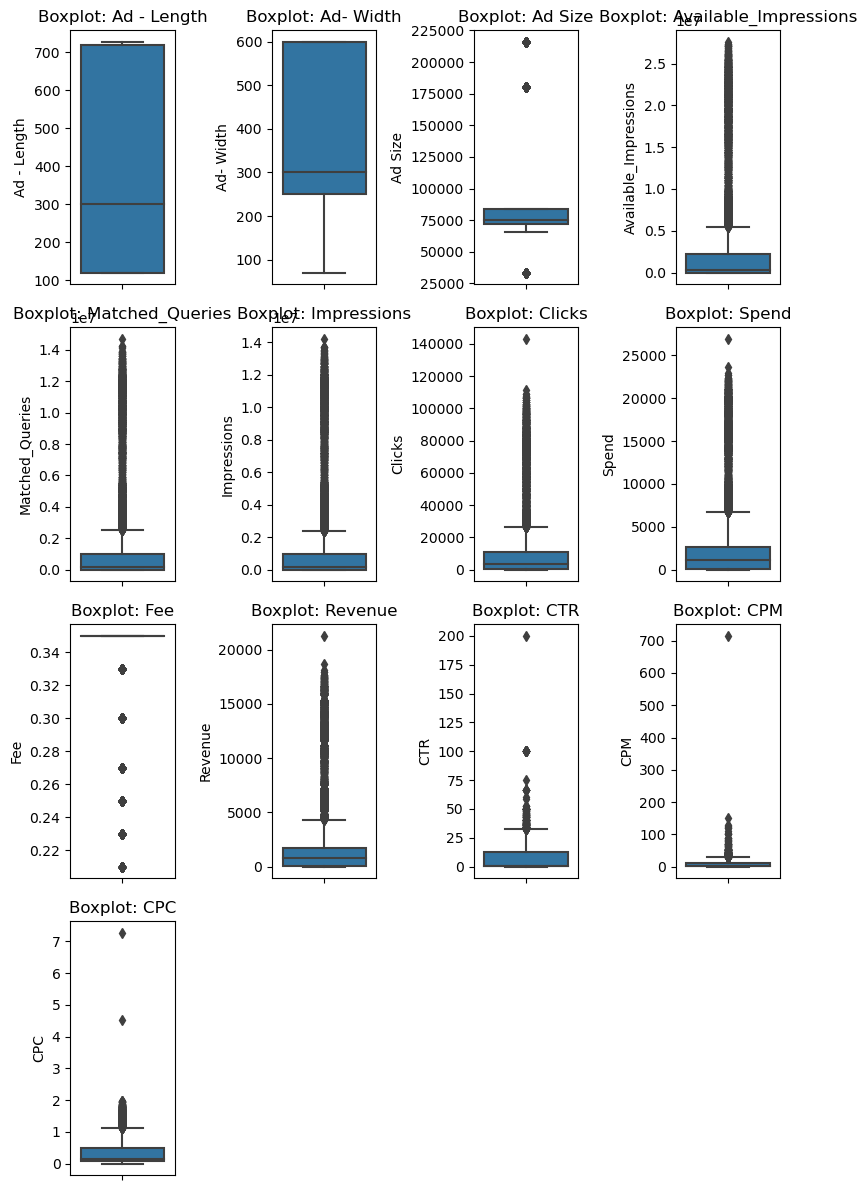

In [28]:
#Check for outliers with each of the columns
plt.figure(figsize = (8,12))
f_list = df_num.columns
for i in range(len(f_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_num[f_list[i]], data = df_num)
    plt.title('Boxplot: {}'.format(f_list[i]))
    plt.tight_layout()

In [29]:
#Defining upper and lower limit
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
for i in f_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

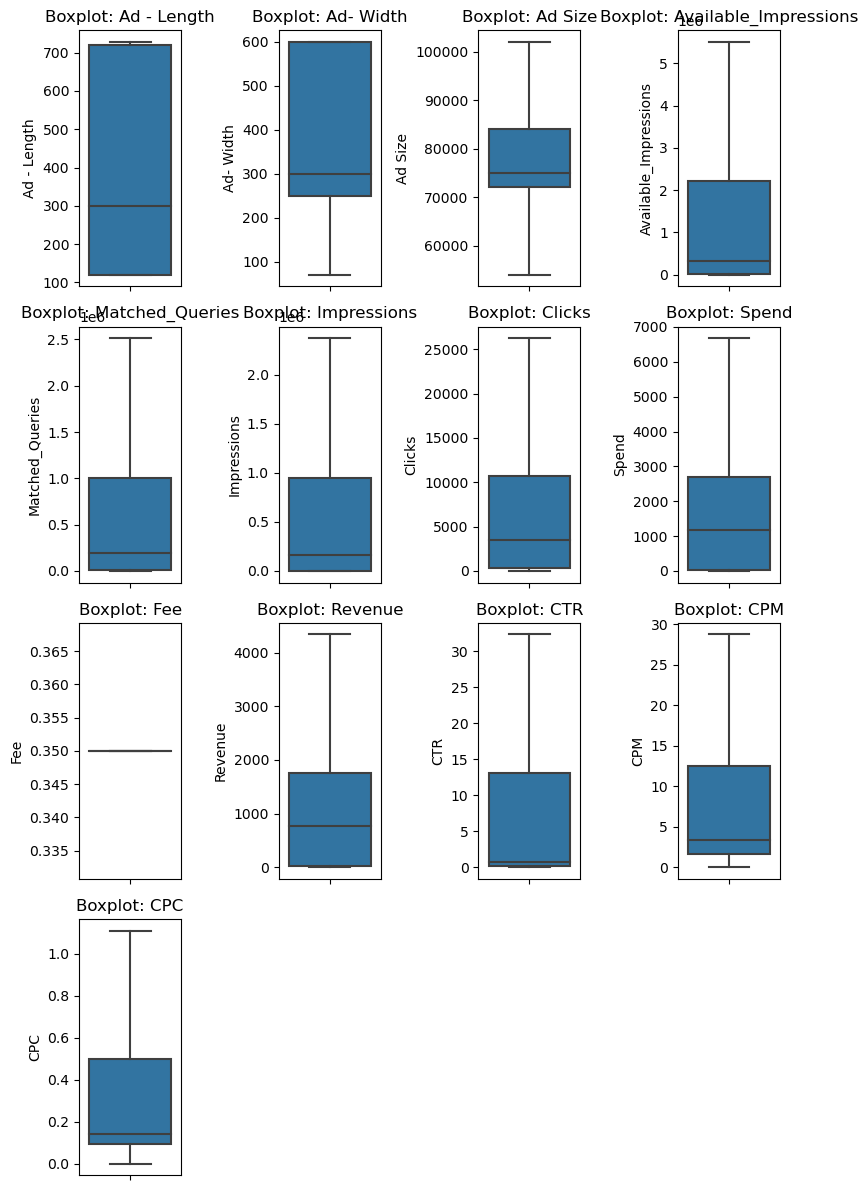

In [31]:
#checking outlier aftreat treatment
plt.figure(figsize = (8,12))
f_list = df_num.columns
for i in range(len(f_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_num[f_list[i]], data = df_num)
    plt.title('Boxplot: {}'.format(f_list[i]))
    plt.tight_layout()

## Standardization using Z-Score

In [34]:
sc = StandardScaler()
scaled_df = sc.fit_transform(df_num)
scaled_df

array([[-0.3920005 , -0.42306173, -0.16180569, ..., -0.86018498,
        -1.0690997 , -1.0353923 ],
       [-0.3920005 , -0.42306173, -0.16180569, ..., -0.89811223,
        -1.0690997 , -0.56441251],
       [-0.23594799, -0.42306173,  0.42441494, ..., -0.89811223,
        -1.0690997 , -0.56441251],
       ...,
       [ 1.42861203, -0.16567098,  1.59685618, ...,  3.05856917,
         3.09081481, -0.73120152],
       [-0.3920005 ,  1.37867358,  1.59685618, ..., -0.89811223,
         0.37878661, -0.56441251],
       [ 1.42861203, -0.16567098,  1.59685618, ..., -0.89811223,
         0.37878661, -0.56441251]])

# 4. Model Building

### Perform Hierarchical Clustering by constructing a Dendrogram using WARD and Euclidean distance.

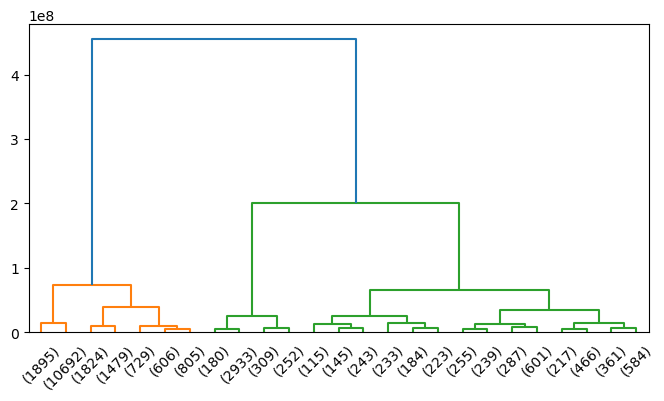

In [36]:
wardlink = linkage(df_num, method = 'ward')
plt.rcParams["figure.figsize"] = [8, 4]
dend = dendrogram(wardlink,truncate_mode='lastp',p = 25)

### Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [37]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

310283.99999999953

In [38]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

188902.86525119044

In [39]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

139952.718922808

In [40]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

103443.46798792669

In [41]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

74695.77117712668

In [42]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

60210.822025591355

In [43]:
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_df)
k_means.inertia_

52263.26547098992

In [44]:
k_means = KMeans(n_clusters = 8)
k_means.fit(scaled_df)
k_means.inertia_

45751.59741106696

In [45]:
k_means = KMeans(n_clusters = 9)
k_means.fit(scaled_df)
k_means.inertia_

40403.58514791088

In [46]:
k_means = KMeans(n_clusters = 10)
k_means.fit(scaled_df)
k_means.inertia_

36423.24589789109

In [47]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\Studio SoundBox\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


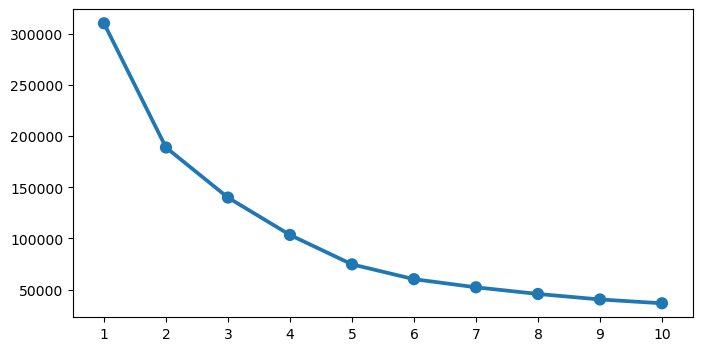

In [48]:
n=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(n, wss);

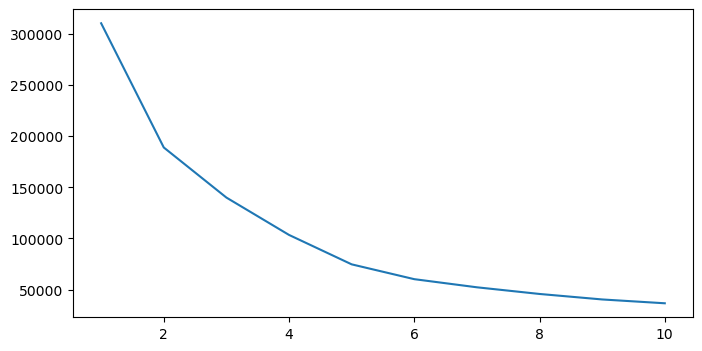

In [49]:
n=[1,2,3,4,5,6,7,8,9,10]
plt.plot(n, wss)

### Print silhouette scores for up to 10 clusters and identify optimum number of clusters

In [51]:
# KMeans with K=2
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [52]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.377271089915075

In [53]:
# KMeans with K=3
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.35144214786495837

In [54]:
# KMeans with K=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.42540130124829434

In [55]:
# KMeans with K=5
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4836179092139885

In [56]:
# KMeans with K=6
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4796695063813273

In [57]:
# KMeans with K=7
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.48217051064194233

In [58]:
# KMeans with K=8
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.5055486795667062

In [59]:
# KMeans with K=9
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.5023303551378494

In [60]:
# KMeans with K=10
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.47373199093432417

In [61]:
# KMeans with K=11
k_means = KMeans(n_clusters = 11,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4860779597881378

### Though the silhouette score for k = 8 is better, the wss plot shows k = 5 is better. So finalising the k values as 5

In [62]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

74695.77249416713

In [63]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

#### Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [64]:
#evaluation of clusters for 5 clusters
df_num["Clus_kmeans5"] = labels
df_num.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.000000,1
1,300.0,250.0,75000.0,1979.0,384.0,380.0,0.0,0.0,0.35,0.0,0.000000,0.0,0.139347,1
2,336.0,250.0,84000.0,1566.0,298.0,297.0,0.0,0.0,0.35,0.0,0.000000,0.0,0.139347,1
3,300.0,250.0,75000.0,643.0,103.0,102.0,0.0,0.0,0.35,0.0,0.000000,0.0,0.139347,1
4,300.0,250.0,75000.0,1550.0,347.0,345.0,0.0,0.0,0.35,0.0,0.000000,0.0,0.139347,1


In [65]:
df_num.Clus_kmeans5.value_counts().sort_index()

0    5668
1    7587
2    6420
3    4495
4    1687
Name: Clus_kmeans5, dtype: int64

In [66]:
#profiling of cluster
clust_profile=df_num
clust_profile=clust_profile.groupby('Clus_kmeans5').mean()
clust_profile['freq']=df_num.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Clus_kmeans5,,,,,,,,,,,,,,
0,683.525759,307.515879,100971.065632,2.064732e+05,1.125753e+05,9.557604e+04,11173.230769,1016.915797,0.35,662.163581,10.923127,9.858460,0.098822,5668
1,396.442863,170.104125,66312.819296,1.313666e+06,6.141246e+05,5.852467e+05,2477.630420,1067.502834,0.35,694.072990,0.327080,1.383107,0.417880,7587
2,142.345794,573.232087,73888.317757,2.736594e+04,1.620953e+04,1.056672e+04,1562.831620,163.958125,0.35,106.572726,15.721169,14.195956,0.101818,6420
3,457.702336,202.729700,73178.402670,5.010427e+06,2.394514e+06,2.273439e+06,10513.331702,5134.198160,0.35,3416.868807,0.217899,1.595294,0.744367,4495
4,143.516301,571.576763,73970.361589,7.569877e+05,5.333278e+05,4.498535e+05,25733.242442,5747.241159,0.35,3794.016859,13.788011,15.556804,0.113103,1687


## Cluster summary

Cluster 0 has the longest ads, the largest ads, the greatest spends, the most income, the highest CPM and CTR, and the second highest clicks. When compared to other clusters, it has a low cost per click.

Cluster 1 has the medium ad duration, smallest ad size, less clicks, medium spending, medium income, highest click through rate, highest CPM, and average CPC.

Cluster 2 has the Shortest ad length, widest ad width, largest ad size, fewest clicks, lowest spend, lowest revenue, greatest CTR, highest CPM, and lowest CPC.

Cluster 3 has the Average ad size, high clicks, high expenditure, high income, lowest CTR, lowest CPM, second highest CPC

Cluster 4 has the shortest ad duration, the largest ad size, the most clicks, the average spend, the greatest revenue, the highest click through rate, the highest CPM, and the lowest CPC.\
